# 4.10: Regional Analysis


## 03  Create a “Region” column based on the “State” column
## 04 Create an exclusion flag for low-activity customers (<5 orders = Low activity)

## IMPORTING LIBRARIES AND DATAFRAME

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import math
from matplotlib.ticker import StrMethodFormatter

In [20]:
# import dataframe

pathData = r'C:\Users\Michael\Desktop\Career Foundry\02 Data Immersion Course\04 Python Fundamentals for Data Analysts\Instacart Basket Analysis 2023 11'
ords_prods_merge = pd.read_pickle(os.path.join(pathData, '02 Data', 'Prepared Data', 'ords_prods_cust.pkl'))

## CHECKING DF DETAILS

In [6]:
ords_prods_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,mean_spend,order_frequency,order_frequency_flag,Gender,customer_state,customer_age,date_joined,customer_dependants,fam_status,customer_income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


## Checking Null for days_since_last_order and order_number match

In [4]:
crosstab = pd.crosstab(ords_prods_merge['days_since_last_order'], ords_prods_merge['order_number'], dropna = False)
crosstab.to_clipboard()

In [5]:
null_mask = ords_prods_merge.isnull().any(axis=1)
null_rows = ords_prods_merge[null_mask]
null_rows['order_number'].value_counts(dropna = False)

order_number
1    2076096
Name: count, dtype: int64

Data for nulls is all match correctly with order_number = 1

## 03  Create a “Region” column based on the “State” column

In [21]:
# Create a vector for each of the four regions
Northeast = ['Northeast', 'Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
Midwest = ['Midwest', 'Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
South = ['South', 'Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
West = ['West', 'Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

# Create an array containing the four regions

regions = [Northeast, Midwest, South, West]

In [22]:
# Loop though the four regions add add the region to ords_prods_merge

for location in regions:
    ords_prods_merge.loc[ords_prods_merge['customer_state'].isin(location), 'Region'] = str(location[0])

C:\Users\Michael\AppData\Local\Temp\ipykernel_4012\2447524985.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Northeast' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  ords_prods_merge.loc[ords_prods_merge['customer_state'].isin(location), 'Region'] = str(location[0])


In [8]:
# count region totals and check for NaN
ords_prods_merge['Region'].value_counts(dropna = False)

Region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [9]:
# check states are correctly applied to regions with crosstab
cross_sta_reg = pd.crosstab(ords_prods_merge['customer_state'], ords_prods_merge['Region'], dropna = False)
print(cross_sta_reg)

Region                Midwest  Northeast   South    West
customer_state                                          
Alabama                     0          0  638003       0
Alaska                      0          0       0  648495
Arizona                     0          0       0  653964
Arkansas                    0          0  636144       0
California                  0          0       0  659783
Colorado                    0          0       0  639280
Connecticut                 0     623022       0       0
Delaware                    0          0  637024       0
District of Columbia        0          0  613695       0
Florida                     0          0  629027       0
Georgia                     0          0  656389       0
Hawaii                      0          0       0  632901
Idaho                       0          0       0  607119
Illinois               633024          0       0       0
Indiana                627282          0       0       0
Iowa                   625493  

In [10]:
# compare spending habit with region
cross_reg_spend = pd.crosstab(ords_prods_merge['Region'], ords_prods_merge['mean_spend'], dropna = False)
print(cross_reg_spend)

mean_spend  High spender  Low spender
Region                               
Midwest          2497034      5100291
Northeast        1875170      3847566
South            3549625      7242260
West             2722093      5570820


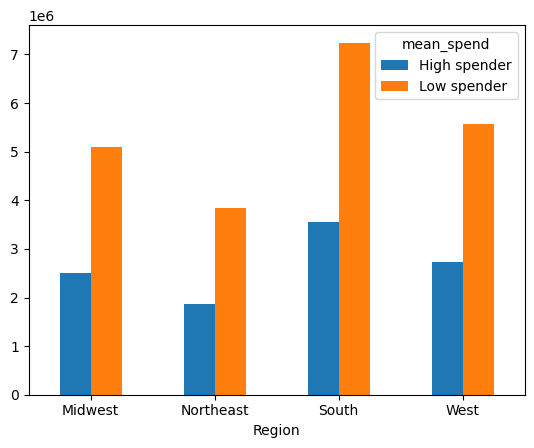

In [11]:
# plot crosstab as bar
reg_spend_plot = cross_reg_spend.plot.bar(rot=0)
# exporting bar
reg_spend_plot.figure.savefig(os.path.join(pathData, '04 Analysis',  'Visualisations', 'reg_spend.png'))

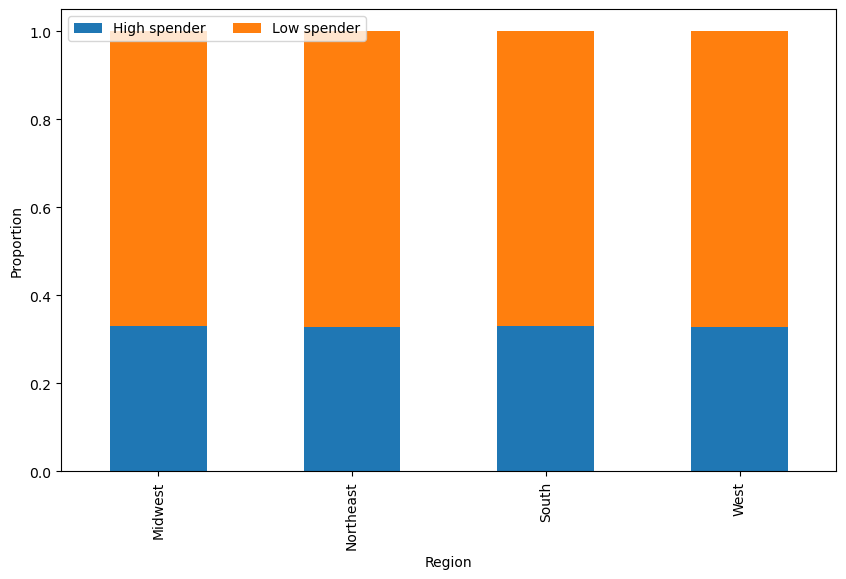

In [12]:
# create a normalised crosstab and plot as a stacked bar chard

cross_reg_spend_norm = pd.crosstab(
    ords_prods_merge['Region'], ords_prods_merge['mean_spend'],
    dropna = False,
    normalize="index")

cross_reg_spend_norm_plot = cross_reg_spend_norm.plot(kind='bar', 
                    stacked=True, 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Region")
plt.ylabel("Proportion")
plt.show()

In [13]:
cross_reg_spend_norm_plot.figure.savefig(os.path.join(pathData, '04 Analysis',  'Visualisations', 'reg_spend_norm.png'))

## 04 Create an exclusion flag for low-activity customers (<5 orders = Low activity)

In [26]:
# create the two types of custoemr activity in a new column
ords_prods_merge.loc[ords_prods_merge['max_order'] < 5, 'activity_flag'] = 'low activity'
ords_prods_merge.loc[ords_prods_merge['max_order'] >= 5, 'activity_flag'] = 'high activity'
ords_prods_merge['activity_flag'].value_counts(dropna = False)

C:\Users\Michael\AppData\Local\Temp\ipykernel_4012\2287577793.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'low activity' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  ords_prods_merge.loc[ords_prods_merge['max_order'] < 5, 'activity_flag'] = 'low activity'


activity_flag
high activity    30964564
low activity      1440295
Name: count, dtype: int64

In [27]:
# create to subframes of customer activity types
df_low_activity = ords_prods_merge[ords_prods_merge['activity_flag'] =='low activity']
df_high_activity = ords_prods_merge[ords_prods_merge['activity_flag'] =='high activity']

In [16]:
df_low_activity.shape

(1440295, 30)

In [17]:
df_high_activity.shape

(30964564, 30)

In [18]:
df_low_activity.to_pickle(os.path.join(pathData, '02 Data','Prepared Data', 'low_activity.pkl'))
df_high_activity.to_pickle(os.path.join(pathData, '02 Data','Prepared Data', 'high_activity.pkl'))

## 05 Create a profiling variable based on age, income, goods, and dependents

### a) Determine and assign income brackets to customers

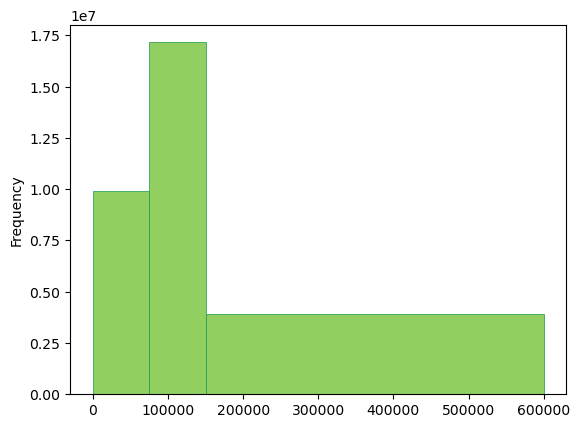

In [19]:
# histogram of income
hist_bins = [0, 75000, 150000, 600000]
hist = df_high_activity['customer_income'].plot.hist(bins = hist_bins, color = '#91cf60', ec = '#1a9850', lw = 0.5)


In [20]:
hist.figure.savefig(os.path.join(pathData, '04 Analysis','Visualisations', 'hist_income.png'))

In [21]:
# make an income flag
# Part 1 find the income of the persons in the 1st, 2nd and 3rd tritile
tritiles = np.quantile(df_high_activity['customer_income'], [1/3, 2/3, 1])
tritiles

array([ 76957., 115133., 593901.])

In [22]:
# round up to 1 sig fig and add a in income flag (low med high) to the df
income_bins = []
n = 0
while n < 3:
    # power = math.floor(math.log10(tritiles[n]))
    # k = tritiles[n]/pow(10000, power)
    k = tritiles[n]/10000
    k = math.ceil(k)
    k = k*10000
    income_bins.append(k)
    n = n+1

In [23]:
# check the upper bound of the income brackets
print(income_bins)

[80000, 120000, 600000]


In [24]:
# attach the income brackets to the customer income amount
df_high_activity.loc[df_high_activity['customer_income'] < income_bins[0], 'income_bracket'] = 'bottom income'

C:\Users\Michael\AppData\Local\Temp\ipykernel_12148\614506243.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high_activity.loc[df_high_activity['customer_income'] < income_bins[0], 'income_bracket'] = 'bottom income'
C:\Users\Michael\AppData\Local\Temp\ipykernel_12148\614506243.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'bottom income' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_high_activity.loc[df_high_activity['customer_income'] < income_bins[0], 'income_bracket'] = 'bottom income'


In [25]:
df_high_activity.loc[df_high_activity['customer_income'] >= income_bins[1], 'income_bracket'] = 'top income'

In [26]:
df_high_activity['income_bracket'].fillna(value = 'middle income', inplace = True)

C:\Users\Michael\AppData\Local\Temp\ipykernel_12148\1041457934.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high_activity['income_bracket'].fillna(value = 'middle income', inplace = True)


In [27]:
# check the number of customers in each bracket
df_high_activity['income_bracket'].value_counts(dropna = False)

income_bracket
bottom income    10991648
middle income    10793133
top income        9179783
Name: count, dtype: int64

### b) Determine and set age brackets

In [30]:
# make an income flag
# Part 1 find the income of the persons in the min, lower tritile, upper tritile and max
tritiles_age = np.quantile(df_high_activity['customer_age'], [0, 1/3, 2/3, 1])
tritiles_age

array([18., 39., 60., 81.])

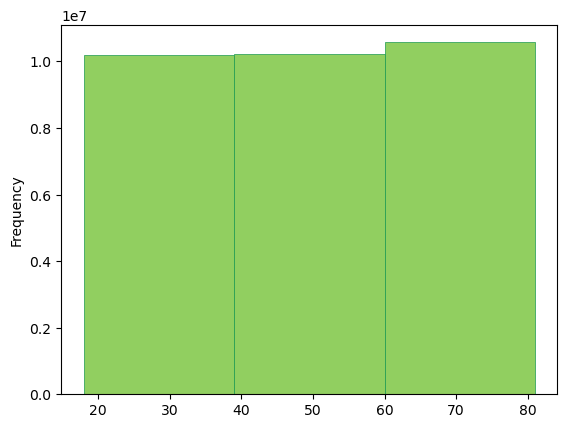

In [31]:
hist = df_high_activity['customer_age'].plot.hist(bins = tritiles_age, color = '#91cf60', ec = '#1a9850', lw = 0.5)


In [32]:
# attach the age brackets to the customer income amount
df_high_activity.loc[df_high_activity['customer_age'] <= tritiles_age[3], 'age_bracket'] = 'elder customer'

C:\Users\Michael\AppData\Local\Temp\ipykernel_4012\3759910687.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high_activity.loc[df_high_activity['customer_age'] <= tritiles_age[3], 'age_bracket'] = 'elder customer'
C:\Users\Michael\AppData\Local\Temp\ipykernel_4012\3759910687.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'elder customer' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_high_activity.loc[df_high_activity['customer_age'] <= tritiles_age[3], 'age_bracket'] = 'elder customer'


In [33]:
df_high_activity.loc[df_high_activity['customer_age'] <= tritiles_age[2], 'age_bracket'] = 'middle age customer'

In [34]:
df_high_activity.loc[df_high_activity['customer_age'] <= tritiles_age[1], 'age_bracket'] = 'younger customer'

In [35]:
df_high_activity['age_bracket'].value_counts(dropna = False)

age_bracket
younger customer       10665110
middle age customer    10186847
elder customer         10112607
Name: count, dtype: int64

### c) Determine and assign dependants brackets to customers

In [34]:
df_high_activity['customer_dependants'].value_counts(dropna = False)

customer_dependants
3    7772516
0    7739681
2    7733261
1    7719106
Name: count, dtype: int64

In [35]:
df_high_activity.loc[df_high_activity['customer_dependants'] < 1, 'dep_bracket'] = 'individual'

C:\Users\Michael\AppData\Local\Temp\ipykernel_12148\1332261844.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high_activity.loc[df_high_activity['customer_dependants'] < 1, 'dep_bracket'] = 'individual'
C:\Users\Michael\AppData\Local\Temp\ipykernel_12148\1332261844.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'individual' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_high_activity.loc[df_high_activity['customer_dependants'] < 1, 'dep_bracket'] = 'individual'


In [36]:
df_high_activity.loc[df_high_activity['customer_dependants'] == 1, 'dep_bracket'] = 'single dependant'

In [37]:
df_high_activity.loc[df_high_activity['customer_dependants'] > 1, 'dep_bracket'] = 'multiple dependants'

In [38]:
df_high_activity['dep_bracket'].value_counts(dropna = False)

dep_bracket
multiple dependants    15505777
individual              7739681
single dependant        7719106
Name: count, dtype: int64

### Compare dependants and age

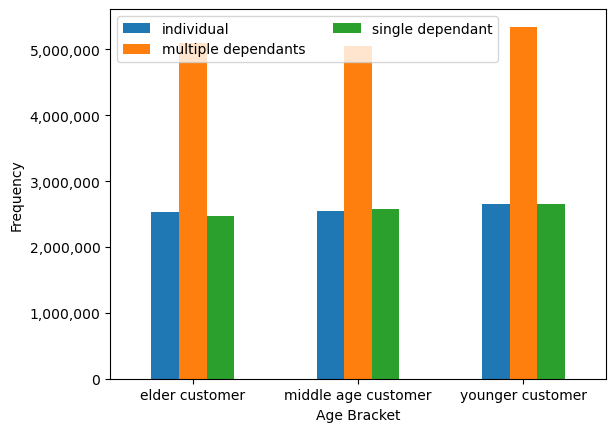

In [39]:
cross_age_deps = pd.crosstab(df_high_activity['age_bracket'], df_high_activity['dep_bracket'], dropna = False)
# plot crosstab as bar
age_deps_plot = cross_age_deps.plot.bar(rot=0)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.legend(loc="upper left", ncol=2)
plt.xlabel("Age Bracket")
plt.ylabel("Frequency")
plt.show()
# exporting bar
age_deps_plot.figure.savefig(os.path.join(pathData, '04 Analysis',  'Visualisations', 'age_deps_plot.png'))

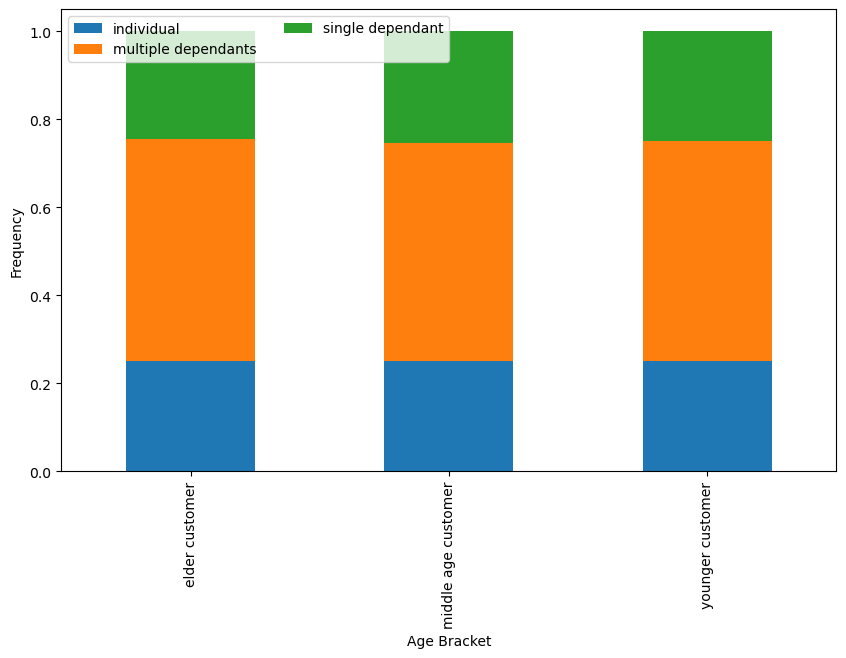

In [40]:
# create a normalised crosstab and plot as a stacked bar chart

cross_age_deps_norm = pd.crosstab(
    df_high_activity['age_bracket'], df_high_activity['dep_bracket'],
    dropna = False,
    normalize="index")

cross_age_deps_norm_plot = cross_age_deps_norm.plot(kind='bar', 
                    stacked=True, 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Age Bracket")
plt.ylabel("Frequency")
plt.show()

In [41]:
cross_age_deps_norm_plot.figure.savefig(os.path.join(pathData, '04 Analysis',  'Visualisations', 'age_deps_plot_norm.png'))

### Compare age and spending

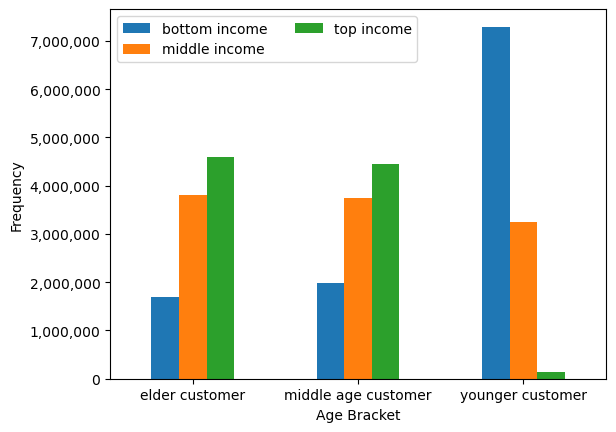

In [42]:
cross_age_deps = pd.crosstab(df_high_activity['age_bracket'], df_high_activity['income_bracket'], dropna = False)
# plot crosstab as bar
age_income_plot = cross_age_deps.plot.bar(rot=0)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.legend(loc="upper left", ncol=2)
plt.xlabel("Age Bracket")
plt.ylabel("Frequency")
plt.show()
# exporting bar
age_income_plot.figure.savefig(os.path.join(pathData, '04 Analysis',  'Visualisations', 'age_income_plot.png'))

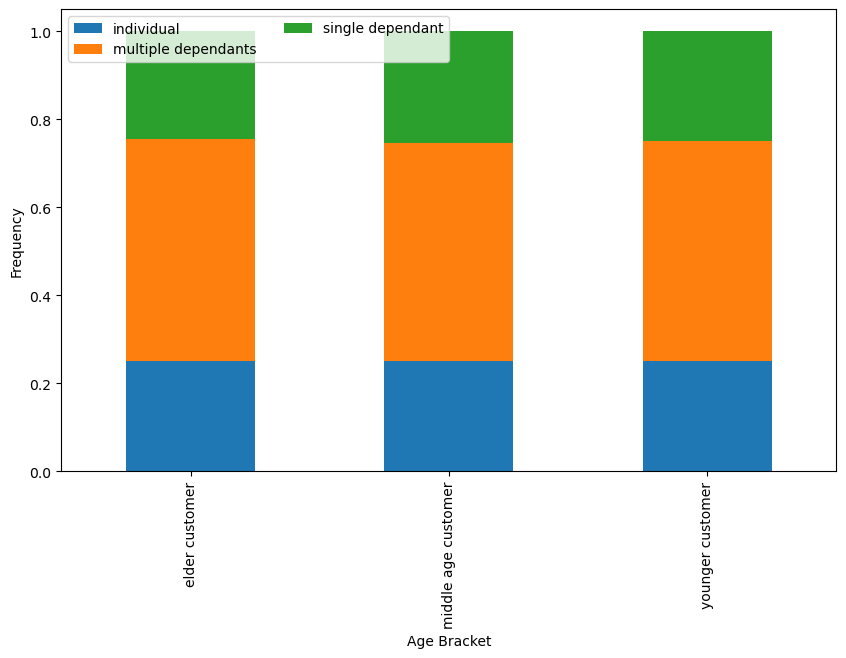

In [43]:
# create a normalised crosstab and plot as a stacked bar chart

cross_age_income_norm = pd.crosstab(
    df_high_activity['age_bracket'], df_high_activity['income_bracket'],
    dropna = False,
    normalize="index")

cross_age_income_norm_plot = cross_age_deps_norm.plot(kind='bar', 
                    stacked=True, 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Age Bracket")
plt.ylabel("Frequency")
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}'))
plt.show()

In [44]:
cross_age_income_norm_plot.figure.savefig(os.path.join(pathData, '04 Analysis',  'Visualisations', 'age_income_plot_norm.png'))

## SAVE ALL DATA

In [45]:
df_high_activity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30964564 entries, 0 to 32404858
Data columns (total 33 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   order_id               object 
 1   user_id                object 
 2   order_number           int64  
 3   orders_day_of_week     int64  
 4   order_hour_of_day      int64  
 5   days_since_last_order  float64
 6   product_id             object 
 7   add_to_cart_order      int64  
 8   reordered              int64  
 9   product_name           object 
 10  aisle_id               int64  
 11  department_id          int64  
 12  prices                 float64
 13  price_range_loc        object 
 14  busiest_days           object 
 15  busiest_period_of_day  object 
 16  max_order              int64  
 17  loyalty_flag           object 
 18  mean_spend             object 
 19  order_frequency        float64
 20  order_frequency_flag   object 
 21  Gender                 object 
 22  customer_state       

In [47]:
df_high_activity.to_pickle(os.path.join(pathData, '02 Data','Prepared Data', 'high_activity.pkl'))

### AGE AND SPENDING HABITS

In [37]:
df_high_activity['price_range_loc'].value_counts()

price_range_loc
Mid-range product     20891771
Low-range product      9674840
High-range product      397953
Name: count, dtype: int64

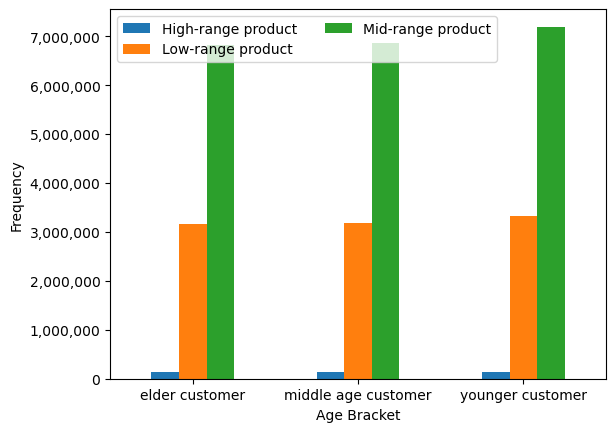

AttributeError: 'DataFrame' object has no attribute 'figure'

In [38]:
age_price = pd.crosstab(df_high_activity['age_bracket'], df_high_activity['price_range_loc'], dropna = False)
# plot crosstab as bar
age_income_plot = age_price.plot.bar(rot=0)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.legend(loc="upper left", ncol=2)
plt.xlabel("Age Bracket")
plt.ylabel("Frequency")
plt.show()
# exporting bar
age_price.figure.savefig(os.path.join(pathData, '04 Analysis',  'Visualisations', 'age_price_plot.png'))

In [ ]:
cross_age_dept_norm = pd.crosstab(
    active_top_depts['department'], active_top_depts['age_bracket'],
    dropna = False,
    normalize="index")

cross_age_dept_norm_plot = cross_age_dept_norm.plot(kind='bar', 
                    stacked=True, 
                    figsize=(10, 6))

plt.legend(loc="best", ncol=2)
plt.xlabel("Department")
plt.ylabel("Proportion")
plt.show()

cross_age_dept_norm_plot.figure.savefig(os.path.join(pathData, '04 Analysis','Visualisations', 'age_dept_norm_plot.png'))